In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
ds = pd.read_csv("csv/cleaned_titanic_data.csv")

In [5]:
ds.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender'], dtype='object')

In [6]:
X = ds.drop(columns = ['Survived'], axis = 1)

In [7]:
y = ds['Survived']

In [8]:
X

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1
887,1,19.000000,0,0,30.0000,0
888,3,29.699118,1,2,23.4500,0
889,1,26.000000,0,0,30.0000,1


In [9]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [13]:
y_train[:5]


331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [14]:
y_train_pred[:5]


array([0, 0, 0, 0, 0])

In [15]:
y_test[:5]


709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [16]:
y_test_pred[:5]


array([0, 0, 0, 0, 0])

In [17]:
confusion_matrix(y_train, y_train_pred)


array([[398,  46],
       [ 71, 197]])

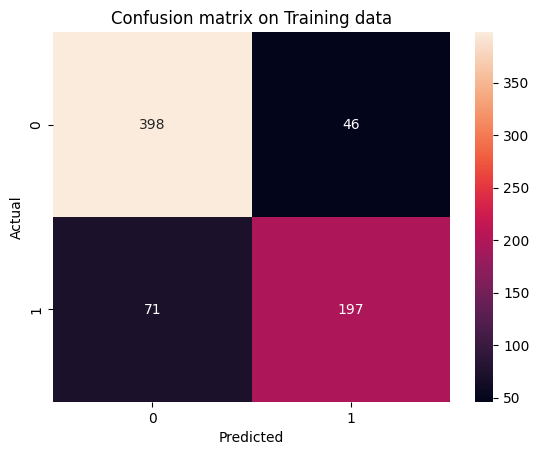

In [18]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='.3g')
plt.title("Confusion matrix on Training data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [19]:
accuracy_score(y_train, y_train_pred)

0.8356741573033708

In [20]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       444
           1       0.81      0.74      0.77       268

    accuracy                           0.84       712
   macro avg       0.83      0.82      0.82       712
weighted avg       0.83      0.84      0.83       712



In [21]:
confusion_matrix(y_test, y_test_pred)

array([[87, 18],
       [37, 37]])

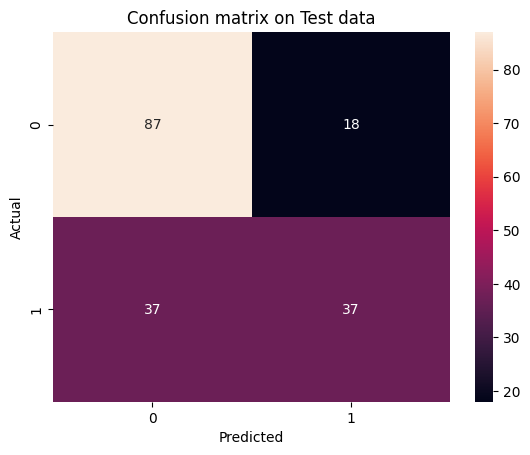

In [22]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.3g')
plt.title("Confusion matrix on Test data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [23]:
accuracy_score(y_test, y_test_pred)


0.6927374301675978